In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats-_and_dogs.zip', origin = _URL, extract = True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
path_to_zip

'/root/.keras/datasets/cats-_and_dogs.zip'

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
# image preparation...


In [0]:

# 1 Read images from the disk.
# 2 Decode contents of these images and convert it into proper grid format as per their RGB content.
# 3 Convert them into floating point tensors.
# 4 Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.


In [0]:
# all these task can be done by the ImageDataGenerator class

In [0]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_data = train_image_generator.flow_from_directory(batch_size = batch_size, directory = train_dir, shuffle = True, target_size = (IMG_HEIGHT, IMG_WIDTH), class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [0]:
validation_data = validation_image_generator.flow_from_directory(batch_size = batch_size, shuffle = True, directory = validation_dir, class_mode = 'binary', target_size = (IMG_HEIGHT, IMG_WIDTH))

Found 1000 images belonging to 2 classes.


In [0]:
# plot the images

In [0]:
sample_train_images, _ = next(train_data)

In [0]:
# i dint get this function

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

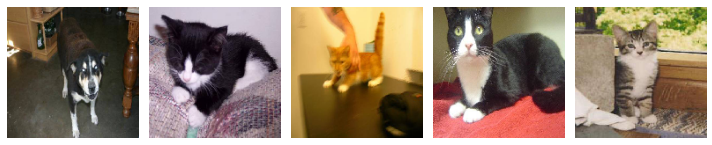

In [0]:
plotImages(sample_train_images[:5])


In [0]:
# creating the model

In [0]:
model = Sequential()
model.add(Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1))

In [0]:
# complile the model

In [0]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [0]:
# instead of using fit we use fit_generator method of ImageDataGenerator class

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
hist = model.fit_generator(train_data, epochs = epochs, steps_per_epoch=total_train // batch_size, validation_data = validation_data, validation_steps=total_val // batch_size)

Epoch 1/15
15/15 [==============================] - 9s 630ms/step - loss: 0.7993 - accuracy: 0.5005 - val_loss: 0.6855 - val_accuracy: 0.4911
Epoch 2/15
15/15 [==============================] - 9s 621ms/step - loss: 0.6777 - accuracy: 0.5406 - val_loss: 0.6646 - val_accuracy: 0.5435
Epoch 3/15
15/15 [==============================] - 9s 612ms/step - loss: 0.6400 - accuracy: 0.5855 - val_loss: 0.6205 - val_accuracy: 0.6373
Epoch 4/15
15/15 [==============================] - 9s 613ms/step - loss: 0.5830 - accuracy: 0.6512 - val_loss: 0.5918 - val_accuracy: 0.6205
Epoch 5/15
15/15 [==============================] - 9s 599ms/step - loss: 0.5024 - accuracy: 0.7350 - val_loss: 0.5949 - val_accuracy: 0.7009
Epoch 6/15
15/15 [==============================] - 9s 596ms/step - loss: 0.4488 - accuracy: 0.7724 - val_loss: 0.5907 - val_accuracy: 0.7232
Epoch 7/15
15/15 [==============================] - 9s 598ms/step - loss: 0.3979 - accuracy: 0.7965 - val_loss: 0.5699 - val_accuracy: 0.6908
Epoch 

In [0]:
# visualize training results

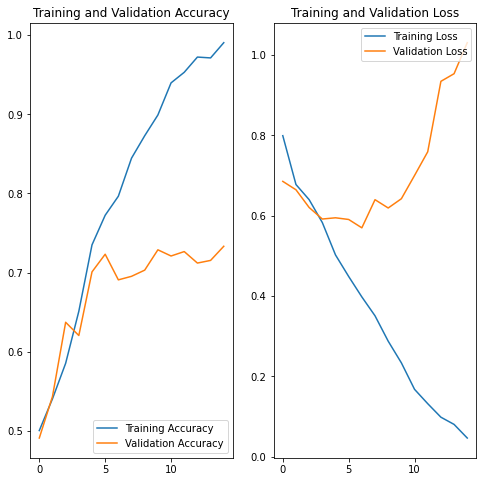

In [0]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
# the model overfits the data...becase the dataset is small 

In [0]:
# we need to use data aaugmentation

In [0]:
# apply horizantal flip

In [0]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

In [0]:
train_data = image_gen.flow_from_directory(batch_size = batch_size, directory = train_dir, shuffle = True, target_size = (IMG_HEIGHT, IMG_WIDTH), class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [0]:
train_data[0][0][0] # first batch

array([[[0.34901962, 0.28627452, 0.227451  ],
        [0.34117648, 0.2784314 , 0.21960786],
        [0.34509805, 0.28235295, 0.22352943],
        ...,
        [0.20000002, 0.19607845, 0.18039216],
        [0.21176472, 0.20784315, 0.19215688],
        [0.1764706 , 0.17254902, 0.15686275]],

       [[0.37254903, 0.30980393, 0.2509804 ],
        [0.3647059 , 0.3019608 , 0.24313727],
        [0.35686275, 0.29411766, 0.23529413],
        ...,
        [0.21568629, 0.21176472, 0.19607845],
        [0.227451  , 0.22352943, 0.20784315],
        [0.19215688, 0.18823531, 0.17254902]],

       [[0.3647059 , 0.3019608 , 0.24313727],
        [0.35686275, 0.29411766, 0.23529413],
        [0.34509805, 0.28235295, 0.22352943],
        ...,
        [0.21176472, 0.20784315, 0.19215688],
        [0.22352943, 0.21960786, 0.20392159],
        [0.18823531, 0.18431373, 0.16862746]],

       ...,

       [[0.3529412 , 0.30588236, 0.21176472],
        [0.3529412 , 0.30588236, 0.21176472],
        [0.34509805, 0

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
val_data = image_gen_val.flow_from_directory(batch_size = batch_size, directory = validation_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [0]:
# creating the network with the dropouts

In [0]:
new_model = Sequential()
new_model.add(Conv2D(16, 3, input_shape = (IMG_HEIGHT, IMG_WIDTH, 3), padding = 'same', activation = 'relu'))
new_model.add(MaxPooling2D())
new_model.add(Dropout(0.2))
new_model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
new_model.add(MaxPooling2D())
new_model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
new_model.add(MaxPooling2D())
new_model.add(Dropout(0.2))
new_model.add(Flatten())
new_model.add(Dense(512, activation = 'relu'))
new_model.add(Dense(1))

In [0]:
new_model.compile(optimizer = 'adam', loss = tf.losses.BinaryCrossentropy(from_logits = True), metrics = ['accuracy'])
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 18, 18, 64)       

In [0]:
hist = new_model.fit_generator(train_data, epochs = epochs, steps_per_epoch = total_train // batch_size, validation_data = val_data, validation_steps = total_val // batch_size)

Epoch 1/15
15/15 [==============================] - 9s 633ms/step - loss: 1.9698 - accuracy: 0.5112 - val_loss: 0.6935 - val_accuracy: 0.4944
Epoch 2/15
15/15 [==============================] - 9s 627ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 9s 631ms/step - loss: 0.6916 - accuracy: 0.5027 - val_loss: 0.6903 - val_accuracy: 0.5022
Epoch 4/15
15/15 [==============================] - 10s 635ms/step - loss: 0.6874 - accuracy: 0.4973 - val_loss: 0.6865 - val_accuracy: 0.5022
Epoch 5/15
15/15 [==============================] - 10s 634ms/step - loss: 0.6799 - accuracy: 0.5299 - val_loss: 0.6841 - val_accuracy: 0.5022
Epoch 6/15
15/15 [==============================] - 10s 635ms/step - loss: 0.6738 - accuracy: 0.5385 - val_loss: 0.6776 - val_accuracy: 0.4967
Epoch 7/15
15/15 [==============================] - 9s 624ms/step - loss: 0.6609 - accuracy: 0.5497 - val_loss: 0.6582 - val_accuracy: 0.5603
Epo

In [0]:
# visualization the model

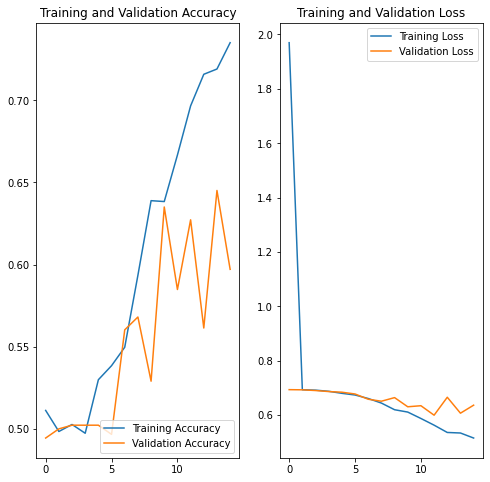

In [0]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()